In [1008]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math
from matplotlib.ticker import FuncFormatter

plt.rc("axes", titlesize="medium")
plt.rc("axes", titlelocation="left")
plt.rc("axes.spines", right=False)
plt.rc("axes.spines", top=False)
# sizets = (8, 4.5)
# plt.rc("figure", figsize=sizets)

legend_right = dict(loc="center left", bbox_to_anchor=[1, 0.5])

np.set_printoptions(precision=3)

# for colour palette
colours = ["#333446", "#7F8CAA", "#B8CFCE", "#EAEFEF"]
pallete = plt.cm.colors.ListedColormap(colours)

regression_c = ["#3D74B6", "#DC3C22", "#EAC8A6"]
regression_pallete = plt.cm.colors.ListedColormap(regression_c)

# --- image main
save_dir = "../portfolio/themes/blog/static/images"
file_name = "2025-07-17-nc-ns-clr"

# we will also set the random seed to 1
seed = 1
np.random.seed(seed)

In [1009]:
m = 25
n = 1

ai = np.random.normal(size=(m, n))
bi = ai * 3.0 + 10 + np.random.normal(scale=1.0, size=(m, 1))

A = np.column_stack([ai, bi])

print(A[:5, :])

[[ 1.624 14.189]
 [-0.612  8.042]
 [-0.528  7.48 ]
 [-1.073  6.513]
 [ 0.865 13.127]]


In [1010]:
m = 100

a1 = np.random.uniform(0.0, 1.0, m)
b1 = 4 * a1 + 1 + np.random.normal(0, 0.1, m)

a2 = np.random.uniform(0.0, 1.0, int(m * 0.5))
b2 = -5 * a2 + 5 + np.random.normal(0, 0.1, int(m * 0.5))

a3 = np.random.uniform(0.0, 1.0, int(m * 0.7))
b3 = 0.1 * a3 + 2 + np.random.normal(0, 0.1, int(m * 0.7))

a = np.concatenate([a1, a2, a3])
b = np.concatenate([b1, b2, b3])
A = np.column_stack([a, b])

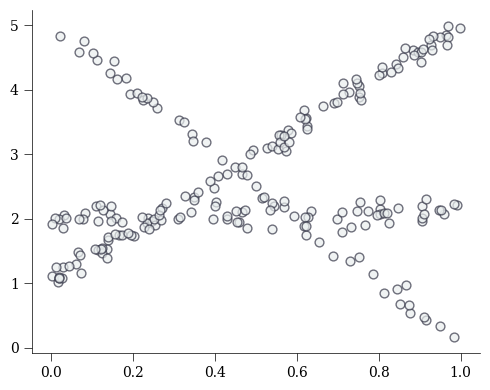

In [1011]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.7,
    s=40,
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-1.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [1012]:
def lingress(a, b, intercept=True):
    if intercept:
        a = np.vstack([a.flatten(), np.ones(len(a))]).T
    return np.linalg.inv(a.T @ a) @ a.T @ b

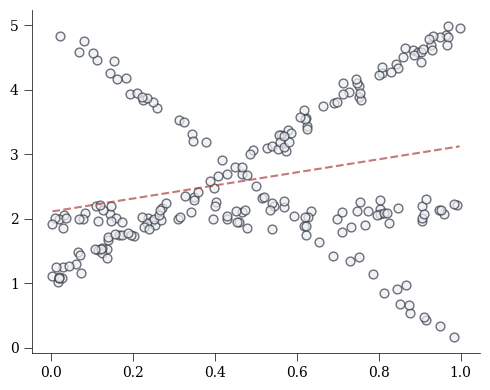

In [1013]:
fig, ax = plt.subplots(figsize=(5, 4))

x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m * 4)
x, y = lingress(A[:, 0], A[:, 1], intercept=True)

plt.scatter(
    A[:, 0],
    A[:, 1],
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.7,
    s=40,
)

plt.plot(
    x_range,
    x * x_range + y,
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-2.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [1014]:
def h(x, y, a, b, p=2):
    return np.abs(np.inner(x, a) + y - b) ** p

In [1015]:
def obj(x, y, a, b, p=2):
    return np.sum(h(x, y, a, b, p=p))

In [1016]:
past = {1: lingress(A[:, 0], A[:, 1])}
print(obj(past[1][0], past[1][1], A[:, 0], A[:, 1], p=2))

269.3751594579023


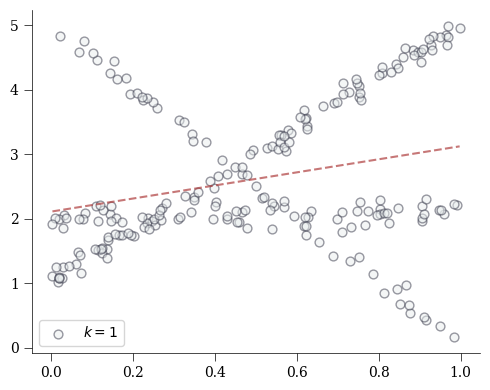

In [1017]:
fig, ax = plt.subplots(figsize=(5, 4))

x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m * 4)
x, y = lingress(A[:, 0], A[:, 1], intercept=True)

plt.scatter(
    A[:, 0],
    A[:, 1],
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.5,
    s=40,
    label="$k=1$",
)

plt.plot(
    x_range,
    x * x_range + y,
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-3.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)

plt.show()

In [1018]:
def auxiliary_function(u, v, A, errors):
    costs = 0.0
    for i in range(len(A)):
        e = h(u, v, A[i, 0], A[i, 1])
        costs += min(errors[i], e)
    return costs

In [1019]:
past = {1: lingress(A[:, 0], A[:, 1])}

errors = []
for i in range(len(A)):
    e = h(past[1][0], past[1][1], A[i, 0], A[i, 1])
    errors.append(e)

print(errors)

[1.9687020154189234, 0.33039186655002023, 0.2811844222625952, 1.7848525949079728, 0.001704811723679899, 0.2796522511403173, 2.6987957384757912, 0.017110102225977294, 1.0205288817329843, 1.24137157414414, 2.586212049572619, 0.47773331257262247, 1.4058013843914694, 0.03292979765951282, 0.04958539120257828, 2.468402147768291, 0.022743036876285, 3.105359217813218, 0.9200429864095351, 0.6767930515748939, 0.5088578727118103, 3.0286616174110224, 0.05876343880686516, 0.46259666939036503, 0.017721964528424405, 0.11079706041257445, 2.42681577581008, 0.13014544449738613, 0.99302245954081, 0.9077152048013946, 0.007983666645215302, 0.2070230761471355, 2.3198861577331633, 0.0029092110693491415, 2.5791496493034822, 0.4101143848895933, 1.2397068540704357, 2.455332746005761, 0.9587761020252841, 3.3845622896474103, 0.2967759792866139, 0.5139401482649771, 3.1496235461883093, 0.9866993832649921, 0.4799588970080237, 0.9167513209111282, 1.1613873486591906, 3.019431136493021, 1.6096642821308726, 0.5817233943

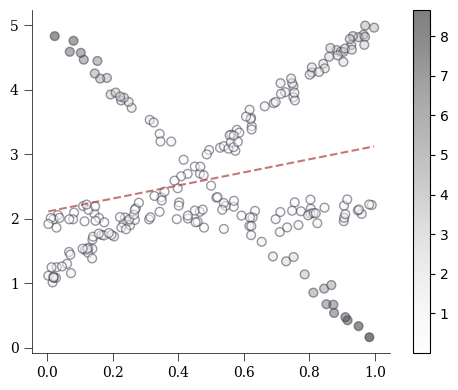

In [1020]:
fig, ax = plt.subplots(figsize=(5, 4))

x_range = np.linspace(min(A[:, 0]), max(A[:, 0]), m * 4)
x, y = lingress(A[:, 0], A[:, 1], intercept=True)

plt.scatter(
    A[:, 0],
    A[:, 1],
    c=errors,
    cmap="Grays",
    # color=regression_c[0],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.5,
    s=40,
    label="$k=1$",
)

plt.plot(
    x_range,
    x * x_range + y,
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
)

cbar = plt.colorbar()
ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

# plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-4.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)

plt.show()

In [1021]:
def get_best_fit(a, b, past):
    best_j = None
    error = np.inf

    for j, (x, y) in past.items():
        e = h(x, y, a, b)
        if e < error:
            error = e
            best_j = j

    return best_j

In [1022]:
def get_init_solutions(A, past, errors):
    candidates = []
    for a, b in A:
        j = get_best_fit(a, b, past)
        x_ab = past[j][0].copy()
        y_ab = b - x_ab * a

        B_ab = []
        for k, (c, d) in enumerate(A):
            if h(x_ab, y_ab, c, d) < errors[k]:
                B_ab.append([c, d])

        if len(B_ab) >= 2:
            B_ab = np.array(B_ab)
            x_ab, y_ab = lingress(B_ab[:, 0], B_ab[:, 1])

        candidates.append((x_ab, y_ab))

    return candidates

In [1023]:
for a, b in A[:1, :]:
    j = get_best_fit(a, b, past)
    x_ab = past[j][0].copy()
    y_ab = b - x_ab * a

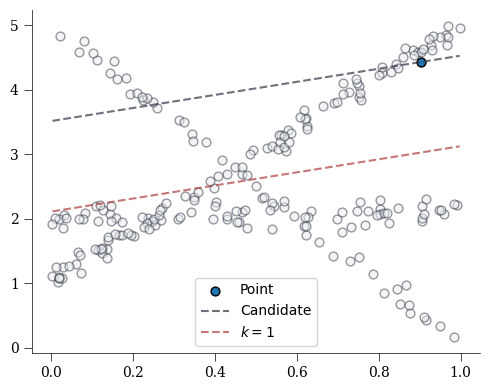

In [1024]:
fig, ax = plt.subplots(figsize=(5, 4))

plt.scatter(
    A[:, 0],
    A[:, 1],
    edgecolors=colours[0],
    color=colours[-1],
    linewidths=1,
    alpha=0.5,
    s=40,
)

plt.scatter(
    A[0, 0],
    A[0, 1],
    edgecolors="black",
    linewidths=1,
    s=40,
    label="Point",
)


plt.plot(
    x_range,
    x_ab * x_range + y_ab,
    color=colours[0],
    alpha=0.7,
    linestyle="--",
    label="Candidate",
)

plt.plot(
    x_range,
    x * x_range + y,
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
    label="$k=1$",
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-5.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [1025]:
def get_d(u, v, A, errors):
    d = 0
    for i, (a, b) in enumerate(A):
        e = h(u, v, a, b)
        d += max(0, errors[i] - e)
    return d

In [1026]:
candidates = get_init_solutions(A, past, errors)

decreases = []
for candidate in candidates:
    d = get_d(candidate[0], candidate[1], A, errors)
    decreases.append(d)

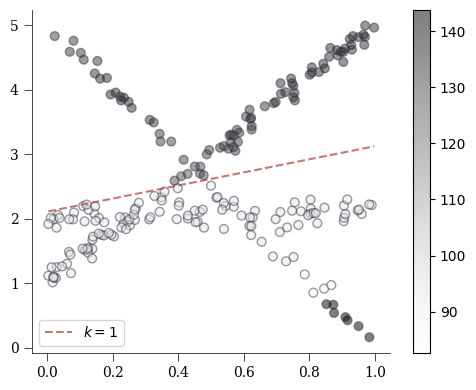

In [1027]:
fig, ax = plt.subplots(figsize=(5, 4))

plt.scatter(
    A[:, 0],
    A[:, 1],
    c=decreases,
    cmap="Grays",
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.5,
    s=40,
)

plt.plot(
    x_range,
    x * x_range + y,
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
    label="$k=1$",
)

cbar = plt.colorbar()
ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.legend()
plt.savefig(
    f"{save_dir}/{file_name}-7.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [1028]:
d1 = max(decreases)
g1 = 0.9

A1 = []
for i, decrease in enumerate(decreases):
    if decrease >= g1 * d1:
        A1.append(i)

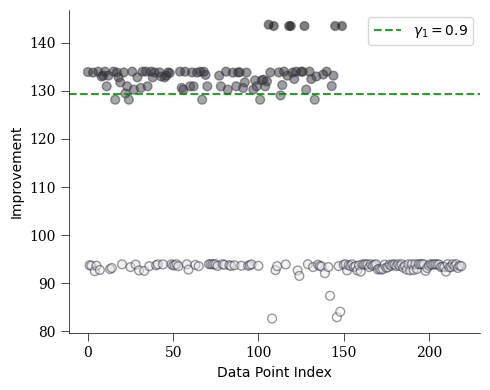

In [1029]:
fig, ax = plt.subplots(figsize=(5, 4))

plt.scatter(
    range(len(decreases)),
    decreases,
    c=decreases,
    cmap="Grays",
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.5,
    s=40,
)

plt.axhline(g1 * d1, alpha=0.8, color="green", linestyle="--", label="$\gamma_1 = 0.9$")

ax.set_xlabel("Data Point Index")
ax.set_ylabel("Improvement")

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-8.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [1030]:
A2 = []
for i in A1:
    x_ab, y_ab = candidates[i]

    B_ab = []
    for j, (c, d) in enumerate(A):
        if h(x_ab, y_ab, c, d) < errors[j]:
            B_ab.append([c, d])

    if len(B_ab) >= 2:
        B_ab = np.array(B_ab)
        x_ab, y_ab = lingress(B_ab[:, 0], B_ab[:, 1])
        A2.append((x_ab, y_ab))
    else:
        A2.append((x_ab, y_ab))

In [1031]:
best = []

for u, v in A2:
    best.append(auxiliary_function(u, v, A, errors))

In [1032]:
def get_init_solutions(A, past, errors):
    candidates = []
    for a, b in A:
        j = get_best_fit(a, b, past)
        x_ab = past[j][0].copy()
        y_ab = b - x_ab * a

        B_ab = []
        for k, (c, d) in enumerate(A):
            if h(x_ab, y_ab, c, d) < errors[k]:
                B_ab.append([c, d])

        if len(B_ab) >= 2:
            B_ab = np.array(B_ab)
            x_ab, y_ab = lingress(B_ab[:, 0], B_ab[:, 1])

        candidates.append((x_ab, y_ab))

    return candidates


def get_d(u, v, A, errors):
    d = 0
    for i, (a, b) in enumerate(A):
        e = h(u, v, a, b)
        d += max(0, errors[i] - e)
    return d


def get_A1(A, candidates, errors, g1=0.9):
    decreases = []
    for candidate in candidates:
        d = get_d(candidate[0], candidate[1], A, errors)
        decreases.append(d)

    d1 = max(decreases)

    A1 = []
    for i, decrease in enumerate(decreases):
        if decrease >= g1 * d1:
            A1.append(i)

    return A1


def get_A2(A, A1, candidates, errors):
    A2 = []
    for i in A1:
        x_ab, y_ab = candidates[i]

        B_ab = []
        for j, (c, d) in enumerate(A):
            if h(x_ab, y_ab, c, d) < errors[j]:
                B_ab.append([c, d])

        if len(B_ab) >= 2:
            B_ab = np.array(B_ab)
            x_ab, y_ab = lingress(B_ab[:, 0], B_ab[:, 1])
            A2.append((x_ab, y_ab))
        else:
            A2.append((x_ab, y_ab))

    return A2


def get_A3(A, A2, errors, g2=1):
    best = []
    for u, v in A2:
        best.append(auxiliary_function(u, v, A, errors))

    A3 = []
    for i, (u, v) in enumerate(A2):
        if best[i] <= g2 * min(best):
            A3.append((u, v))

    return A3

In [1033]:
def algorithm3(A, past, errors, g1=0.9, g2=1):
    candidates = get_init_solutions(A, past, errors)
    A1 = get_A1(A, candidates, errors, g1)
    A2 = get_A2(A, A1, candidates, errors)
    A3 = get_A3(A, A2, errors, g2)
    return A3

In [1034]:
def algorithm4(A, errors, u0, v0, max_iter=100):
    ul, vl = u0, v0

    for _ in range(max_iter):
        B = []
        for i, (a, b) in enumerate(A):
            if h(ul, vl, a, b) < errors[i]:
                B.append([a, b])

        if len(B) < 2:
            break

        B = np.array(B)

        _u, _v = lingress(B[:, 0], B[:, 1])

        B_new = []
        for i, (a, b) in enumerate(A):
            if h(_u, _v, a, b) < errors[i]:
                B_new.append([a, b])

        if np.array_equal(np.array(B), np.array(B_new)):
            return _u, _v

        ul, vl = _u, _v

    return ul, vl

In [1035]:
def get_A4(A, A3, errors, max_iter=100):
    A4 = []
    for u0, v0 in A3:
        u, v = algorithm4(A, errors, u0, v0, max_iter=max_iter)
        A4.append((u, v))

    return A4


def get_A5(A, A4, errors, g3=10):
    best = []
    for u, v in A4:
        best.append(auxiliary_function(u, v, A, errors))

    A5 = []
    for i, (u, v) in enumerate(A4):
        if best[i] <= g3 * min(best):
            A5.append((u, v))

    return A5

In [1036]:
def subset_obj(y, A, x):
    A = np.column_stack([A, np.ones(len(A))])
    return np.sum((y - A @ x) ** 2)


def cur_obj(y, A, C, i, p):
    x = lingress(A[C == C[i]], y[C == C[i]])
    c_obj = subset_obj(y[C == C[i]], A[C == C[i]], x)

    x = lingress(A[C == p], y[C == p])
    c_obj += subset_obj(y[C == p], A[C == p], x)
    return c_obj


def new_obj(y, A, C, i, p, Cp):
    x = lingress(A[Cp == C[i]], y[Cp == C[i]])
    n_obj = subset_obj(y[Cp == C[i]], A[Cp == C[i]], x)

    x = lingress(A[Cp == p], y[Cp == p])
    n_obj += subset_obj(y[Cp == p], A[Cp == p], x)
    return n_obj


def iterative_improvement(A, y, C, k, l=1):
    m = A.shape[0]
    i = m - 1

    while True:
        improved = False

        for _ in range(m):
            i = (i + 1) % m

            if np.sum(C == C[i]) <= l + 1:
                continue

            best_p = None
            improvement = 0

            for p in range(k):
                if C[i] == p:
                    continue

                Cp = C.copy()
                Cp[i] = p

                c_obj = cur_obj(y, A, C, i, p)
                n_obj = new_obj(y, A, C, i, p, Cp)

                r = c_obj - n_obj

                if r > improvement:
                    improvement = r
                    best_p = p

            if improvement > 0:
                C[i] = best_p
                improved = True

        if not improved:
            break

    return C

In [1037]:
def refine(a, b, A5, past):
    A6 = []
    for _, (u, v) in enumerate(A5):
        past_tmp = past.copy()
        past_tmp[len(past)] = (u, v)
        k = len(past_tmp)

        C = np.zeros(len(a), dtype=int)

        for i, (ai, bi) in enumerate(zip(a, b)):
            best = 0
            error = np.inf

            for j, (x, y) in enumerate(past_tmp.values()):
                e = h(x, y, ai, bi)
                if e < error:
                    error = e
                    best = j
            C[i] = best

        C = iterative_improvement(a, b, C, k)

        refined = []
        for c_id in range(k):
            mask = C == c_id
            if np.sum(mask) >= 2:
                x, y = lingress(a[mask], b[mask])
                refined.append((x, y))
            else:
                refined.append(list(past_tmp.values())[c_id])

        obj = 0
        for i, (ai, bi) in enumerate(zip(a, b)):
            cluster = C[i]
            x, y = refined[cluster]
            obj += h(x, y, ai, bi)

        A6.append((refined, obj))

    return A6


def algorithm5(a, b, k=3, g1=0.9, g2=1, g3=10, max_iter=100):
    past = {0: lingress(a, b)}
    A = np.column_stack((a, b))

    for _ in range(2, k + 1):
        errors = []
        for ai, bi in zip(a, b):
            error = np.inf
            for x, y in past.values():
                e = h(x, y, ai, bi)
                if e < error:
                    error = e
            errors.append(error)

        A3 = algorithm3(A, past, errors, g1=g1, g2=g2)
        A4 = get_A4(A, A3, errors, max_iter=max_iter)
        A5 = get_A5(A, A4, errors, g3=g3)
        A6 = refine(A[:, 0], A[:, 1], A5, past)

        best = 0
        best_obj = np.inf
        for i, (_, obj) in enumerate(A6):
            if obj < best_obj:
                best_obj = obj
                best = i

        for j, (x, y) in enumerate(A6[best][0]):
            past[j] = (x, y)

    return past

In [1038]:
final_solution = algorithm5(A[:, 0], A[:, 1], 3)
print("Final regression lines:", final_solution)

Final regression lines: {0: (3.9597699719369115, 1.035631939268551), 1: (-4.991572498582186, 5.009295867263579), 2: (0.09920657740173118, 2.0059790561336297)}


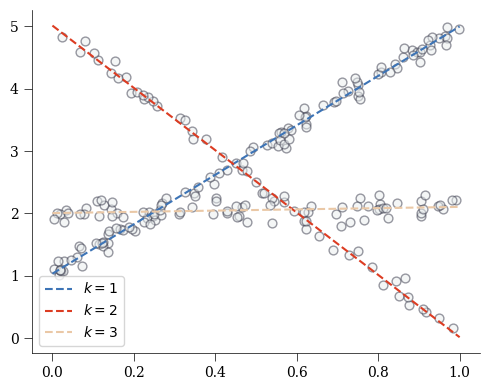

In [1075]:
fig, ax = plt.subplots(figsize=(5, 4))

plt.scatter(
    A[:, 0],
    A[:, 1],
    edgecolors=colours[0],
    color=colours[-1],
    linewidths=1,
    alpha=0.5,
    s=40,
)

x_range = np.linspace(0, 1, 100)

for i in range(len(final_solution)):
    x, y = final_solution[i]

    plt.plot(
        x_range,
        x * x_range + y,
        # alpha=0.7,
        linestyle="--",
        label=f"$k={i+1}$",
        color=regression_c[i],
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-10.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [1096]:
m = 25

a1 = np.random.uniform(0.6, 1.0, m)
b1 = 3 * a1 + 2 + np.random.normal(0, 0.1, m)

a2 = np.random.uniform(0.4, 0.8, m)
b2 = 3 * a2 + 5 + np.random.normal(0, 0.1, m)

a3 = np.random.uniform(0.2, 0.6, m)
b3 = 3 * a3 + 7 + np.random.normal(0, 0.1, m)

a4 = np.random.uniform(0.0, 0.4, m)
b4 = 3 * a4 + 10 + np.random.normal(0, 0.1, m)

a = np.concatenate([a1, a2, a3, a4])
b = np.concatenate([b1, b2, b3, b4])

A = np.column_stack([a, b])

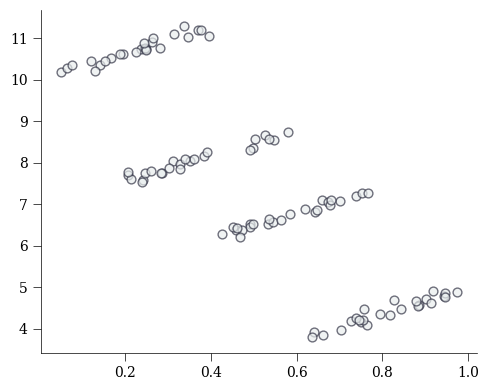

In [1097]:
fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.7,
    s=40,
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-11.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

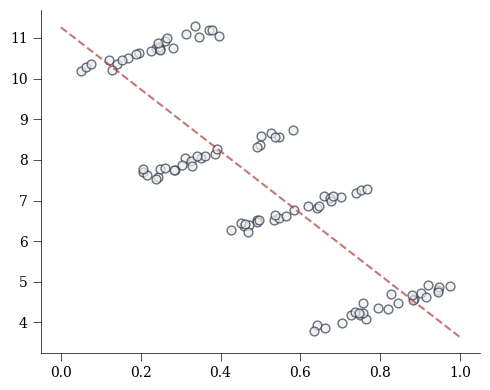

In [1098]:
past = {0: lingress(A[:, 0], A[:, 1])}

fig, ax = plt.subplots(figsize=(5, 4))
plt.scatter(
    A[:, 0],
    A[:, 1],
    color=colours[-1],
    edgecolors=colours[0],
    linewidths=1,
    alpha=0.7,
    s=40,
)

plt.plot(
    x_range,
    past[0][0] * x_range + past[0][1],
    color="#AF3E3E",
    alpha=0.7,
    linestyle="--",
)

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-12.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()

In [1100]:
final_solution = algorithm5(A[:, 0], A[:, 1], 4)
print("Final regression lines:", final_solution)

Final regression lines: {0: (-7.425908965588184, 9.590797597566667), 1: (-8.509141420769701, 12.729822194383967), 2: (-7.615934159864047, 10.893594773548582), 3: (-9.895326783609692, 14.646889165313363)}


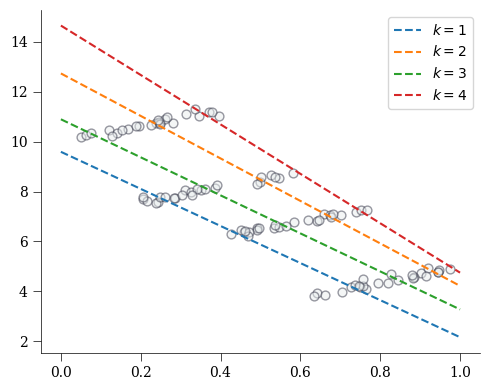

In [1102]:
fig, ax = plt.subplots(figsize=(5, 4))

plt.scatter(
    A[:, 0],
    A[:, 1],
    edgecolors=colours[0],
    color=colours[-1],
    linewidths=1,
    alpha=0.5,
    s=40,
)

x_range = np.linspace(0, 1, 100)

for i in range(len(final_solution)):
    x, y = final_solution[i]

    plt.plot(
        x_range,
        x * x_range + y,
        # alpha=0.7,
        linestyle="--",
        label=f"$k={i+1}$",
        # color=regression_c[i],
    )

ax.tick_params(axis="both", labelfontfamily="Serif", labelsize=10, width=0.5, length=6)

for s in ["top", "left", "right", "bottom"]:
    ax.spines[s].set_linewidth(0.5)

plt.legend()
plt.tight_layout()
plt.savefig(
    f"{save_dir}/{file_name}-13.svg", dpi=75, bbox_inches="tight", edgecolor="none"
)
plt.show()